In [6]:
import numpy as np
from osgeo import gdal
import os
from tqdm import tqdm

In [7]:
# 20230509 五河影像裁剪部分
ProFiles = os.listdir(r'E:\Desktop\Summary\种植结构提取-水稻\datas\RVI')
shpfile = r'E:\Desktop\Summary\种植结构提取-水稻\datas\clipshp\玉米样本1.shp'
for item in tqdm(ProFiles):
    if item.lower().endswith('.tif'):
    # if item[-4:] == '.tif':
        src = (r'E:\Desktop\Summary\种植结构提取-水稻\datas\RVI\\{}'.format(item))
        dst = os.path.join(r'E:\Desktop\Summary\种植结构提取-水稻\datas\Sample_corn', 'cliprvi' + item.split('\\')[-1])
        ds = gdal.Warp(dst,  # 裁剪图像保存完整路径（包括文件名）
                       src,  # 待裁剪的影像
                       format='GTiff',  # 保存图像的格式
                       cutlineDSName=shpfile,  # 矢量文件的完整路径
                       cropToCutline=True,  # 保证裁剪后影像大小跟矢量文件的图框大小一致（设置为False时，结果图像大小会跟待裁剪影像大小一样，则会出现大量的空值区域）
                       # cutlineWhere="FIELD = 'whatever'",
                       dstNodata=0)
        ds = None

100%|██████████| 13/13 [00:00<00:00, 149.25it/s]


In [ ]:
# hdf_file.lower().endswith('.hdf')

In [3]:
# 读取栅格并计算NDVI平均值

In [8]:
import gdal
import numpy as np

ndvi = np.array([])
ndgi = np.array([])
rvi = np.array([])
# 打开栅格文件
filedictory = os.listdir(r'E:\Desktop\Summary\种植结构提取-水稻\datas\Sample_corn')
for item in tqdm(filedictory):
    src = (r'E:\Desktop\Summary\种植结构提取-水稻\datas\Sample_corn\\{}'.format(item))
    if item[-4:] == '.tif' and item[:8] == 'clipndvi':
        dataset = gdal.Open(src)
        # 获取栅格波段
        band = dataset.GetRasterBand(1)
        # 获取栅格数据的宽度和高度
        cols = dataset.RasterXSize
        rows = dataset.RasterYSize
        # 读取栅格数据
        data = band.ReadAsArray(0, 0, cols, rows)
        # 计算像元的平均值
        mean = np.nanmean(data)
        ndvi = np.append(ndvi, mean)
    if item[-4:] == '.tif' and item[:8] == 'clipndgi':
        dataset = gdal.Open(src)
        # 获取栅格波段
        band = dataset.GetRasterBand(1)
        # 获取栅格数据的宽度和高度
        cols = dataset.RasterXSize
        rows = dataset.RasterYSize
        # 读取栅格数据
        data = band.ReadAsArray(0, 0, cols, rows)
        # 计算像元的平均值
        mean = np.nanmean(data)
        ndgi = np.append(ndgi, mean)
    if item[-4:] == '.tif' and item[:7] == 'cliprvi':
        dataset = gdal.Open(src)
        # 获取栅格波段
        band = dataset.GetRasterBand(1)
        # 获取栅格数据的宽度和高度
        cols = dataset.RasterXSize
        rows = dataset.RasterYSize
        # 读取栅格数据
        data = band.ReadAsArray(0, 0, cols, rows)
        # 计算像元的平均值
        mean = np.nanmean(data)
        rvi = np.append(rvi, mean)
print('ndvi:\n', ndvi, '\nndgi:\n', ndgi, '\nrvi:\n', rvi)

100%|██████████| 18/18 [00:00<00:00, 234.41it/s]

ndvi:
 [0.13744773 0.54794288 0.67678112 0.64988005 0.39190602 0.26711866] 
ndgi:
 [-0.08439678  0.13176204  0.21568678  0.17739724 -0.01015028 -0.08365534] 
rvi:
 [0.58281589 0.16368718 0.07898598 0.0948187  0.29698363 0.42140558]


In [9]:
aa = np.append(ndvi, ndgi)
aa = np.append(aa, rvi)
aa
np.savetxt(r'E:\Desktop\Summary\种植结构提取-水稻\datas\Sample_corn\ndvi_ndgi_rvi.csv', aa, delimiter=',')

In [10]:
bb = aa.reshape((3, 6))

In [11]:
import pandas as pd

df = pd.DataFrame(bb)
df=df.rename(columns={0: '07-03', 1: '08-02', 2: '08-22', 3: '09-16', 4: '10-06', 5: '10-21'},index={0:'ndvi',1:'ndgi',2:'rvi'})
df.to_csv(r'E:\Desktop\Summary\种植结构提取-水稻\datas\Sample_corn\corn_ndvi_ndgi_rvi.csv')

Text(0.5, 1.0, 'Line Chart')

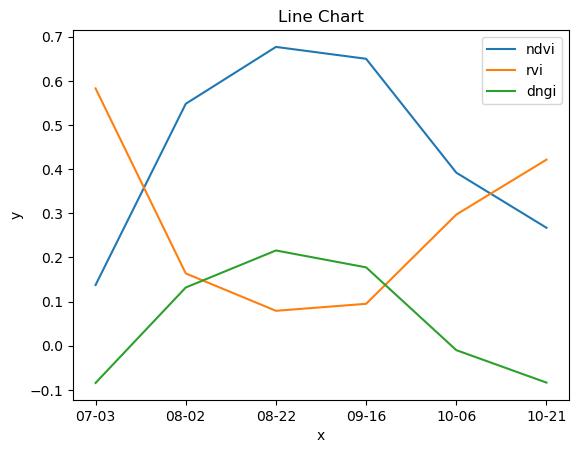

In [13]:
import matplotlib.pyplot as plt

ndvi = bb[0, :]
ndgi = bb[1, :]
rvi = bb[2, :]
date = np.array(['07-03', '08-02', '08-22', '09-16', '10-06', '10-21'])
ndvi
plt.plot(date, ndvi, label='ndvi')
plt.plot(date, rvi, label='rvi')
plt.plot(date, ndgi, label='dngi')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Chart')